<a href="https://colab.research.google.com/github/Luk1313/Lu/blob/main/Evolucion_Acciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Aplicación de Conceptos de Visualización en el Proyecto Tesla

En este proyecto aplicamos tres conceptos clave de visualización de datos con Python: **Dataset**, **Dimensiones Visuales** y **Tipos de Gráfico**. A continuación, se explica cómo se integraron estos elementos en el análisis estratégico de la evolución de las acciones de Tesla.



## 📁 Dataset a usar

El dataset utilizado corresponde a datos históricos de las acciones de Tesla, organizado en un **DataFrame de Pandas** con variables financieras como:

- **Fecha**: Identificación temporal de cada registro.
- **Precio de apertura y cierre**: Valores iniciales y finales de cada sesión.
- **Máximos y mínimos**: Puntos más altos y bajos alcanzados en cada período.
- **Volumen transado**: Cantidad de acciones negociadas.
- **Variación porcentual**: Cambios relativos entre sesiones.

Dado que los datos son **cuantitativos y temporales**, fue necesario procesarlos antes de su visualización.

---

### **📊 Herramientas Utilizadas**
Para organizar y visualizar los datos utilizamos:

- **Pandas** → Manipulación y limpieza del dataset.  
- **NumPy** → Cálculos numéricos y métricas.  
- **Plotly** → Visualización interactiva de tendencias.  

El flujo de trabajo incluyó **carga, limpieza, ordenamiento y agregación de datos** para facilitar su análisis.

---

### **📌 Ejemplo de Código**
Ejemplo breve de cómo procesamos los datos antes de visualizarlos:

```python
import pandas as pd

df = pd.read_csv("tesla_historical_data.csv")  # Cargar el dataset
df["Fecha"] = pd.to_datetime(df["Fecha"])  # Convertir fechas
df = df.dropna().sort_values(by="Fecha")  # Limpiar y ordenar datos
df["Variación (%)"] = df["Último"].pct_change() * 100  # Crear variación porcentual

In [ ]:
# @title
pip install pandas openpyxl  matplotlib seaborn dash

In [ ]:
# @title
# prompt: importa el archivo en el entorno y visualiza sus columnas

import pandas as pd

df = pd.read_excel('Datos históricos.xlsx', sheet_name="datos")
df.head()


,Fecha,Último,Apertura,Máximo,Mínimo
0,19.03.2025,235.86,231.61,241.41,229.20
1,18.03.2025,225.31,228.15,230.10,222.28
2,17.03.2025,238.01,245.05,245.40,232.80
3,14.03.2025,249.98,247.31,251.58,240.73
4,13.03.2025,240.68,248.13,248.29,232.60


In [ ]:
# @title
import pandas as pd

# Convierte la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d.%m.%Y')

# Convierte las columnas 'Último', 'Apertura', 'Máximo', 'Mínimo' a tipo numérico con decimales
for col in ['Último', 'Apertura', 'Máximo', 'Mínimo']:
    # Asegurarse de que los valores sean cadenas antes de reemplazar las comas
    df[col] = pd.to_numeric(df[col].replace({',': '.'}, regex=True), errors='coerce')

# Mostrar las primeras filas para verificar el resultado
df.head()


,Fecha,Último,Apertura,Máximo,Mínimo
0,2025-03-19,235.86,231.61,241.41,229.20
1,2025-03-18,225.31,228.15,230.10,222.28
2,2025-03-17,238.01,245.05,245.40,232.80
3,2025-03-14,249.98,247.31,251.58,240.73
4,2025-03-13,240.68,248.13,248.29,232.60


In [ ]:
# @title
# Guarda el DataFrame con el nuevo formato en un nuevo archivo Excel
df.to_excel('Datos_históricos_Actualizado.xlsx', index=False, sheet_name='datos')


In [ ]:
# @title
#importa el archivo para su visualizacion
import pandas as pd
df = pd.read_excel('Datos_históricos_Actualizado.xlsx', sheet_name="datos")
df.head()


,Fecha,Último,Apertura,Máximo,Mínimo
0,2025-03-19,235.86,231.61,241.41,229.20
1,2025-03-18,225.31,228.15,230.10,222.28
2,2025-03-17,238.01,245.05,245.40,232.80
3,2025-03-14,249.98,247.31,251.58,240.73
4,2025-03-13,240.68,248.13,248.29,232.60


## 📈 Tipos de Gráfico

La elección del **tipo de gráfico** es fundamental para comunicar la información de forma efectiva. En este proyecto, utilizamos principalmente un **gráfico de líneas**, ya que es el más adecuado para mostrar la evolución de una variable a lo largo del tiempo, como el precio de una acción.

Este tipo de gráfico permitió observar:

✔ **Tendencias**: Subidas y bajadas en los valores de la acción.  
✔ **Puntos críticos**: Máximos y mínimos resaltados con marcadores.  
✔ **Patrones**: Períodos de estabilidad, volatilidad y acumulación.  

---

### 📊 Herramientas Utilizadas

Para la visualización, utilizamos diferentes herramientas en cada gráfico:

1. **Matplotlib**: Se empleó para generar el primer gráfico de líneas estático. Es útil para visualizaciones simples y permite representar la evolución del precio sin interactividad.
2. **Seaborn**: Se utilizó para mejorar la estética y aplicar estilos corporativos cuantitativos.
3. **Pandas**: Fue clave para estructurar y procesar los datos en un **DataFrame** antes de graficarlos.

En el segundo gráfico, además de estas herramientas, agregamos **Plotly**, lo que permitió que la visualización fuera interactiva, con opciones como zoom, selección de datos y resaltado dinámico de valores.

---

### 📌 Ejemplo de Aplicación

Para el primer gráfico, utilizamos **Matplotlib** con los datos estructurados en Pandas:

```python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 6))
plt.plot(df["Fecha"], df["Último"], label="Precio de Cierre", color="royalblue", linewidth=2)
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("Evolución del Precio de Tesla")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()
```

En el segundo gráfico, utilizamos **Plotly** para permitir la interactividad:

```python
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=df['Fecha'], y=df['Último'], mode='lines', name='Último', line=dict(color='#1E90FF', width=3)))
fig.show()
```

---

### 📊 Diferencias Clave

| Característica       | Primer Gráfico (Matplotlib) | Segundo Gráfico (Plotly) |
|---------------------|--------------------------|-------------------------|
| **Interactividad**  | ❌ No interactivo        | ✅ Zoom, selección, hover |
| **Personalización** | ✅ Limitada              | ✅ Mayor flexibilidad    |
| **Estilo**         | ✅ Sobrio                 | ✅ Más dinámico y visual |

Con esta combinación de herramientas, logramos visualizar los datos de manera eficiente, desde una representación estática hasta una interactiva y más detallada.


<ipython-input-21-195118ef64ab>:9: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Fecha"] = pd.to_datetime(df["Fecha"])


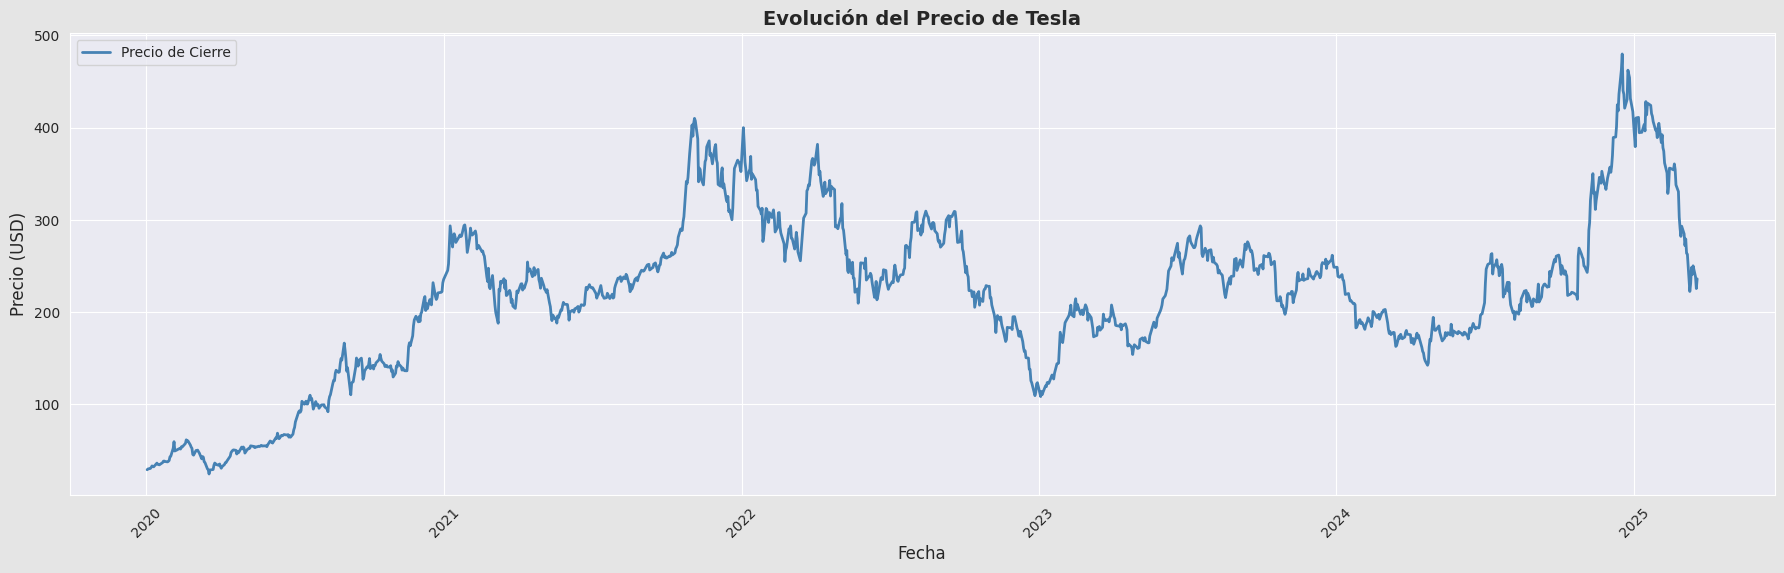

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
archivo = "Datos históricos.xlsx"
df = pd.read_excel(archivo, sheet_name="datos")

df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.sort_values(by="Fecha")

# Configurar el gráfico
plt.figure(figsize=(22, 6), facecolor="#E5E5E5")  # Fondo gris cálido
sns.set_style("darkgrid")
sns.lineplot(x=df["Fecha"], y=df["Último"], color="#4682B4", linewidth=2, label="Precio de Cierre")  # Azul más suave

# Etiquetas y formato
plt.xlabel("Fecha", fontsize=12)
plt.ylabel("Precio (USD)", fontsize=12)
plt.title("Evolución del Precio de Tesla", fontsize=14, fontweight="bold")
plt.legend()
plt.xticks(rotation=45)
plt.yticks(fontsize=10)
plt.show()

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

# Cargar datos
archivo = "Datos históricos.xlsx"
df = pd.read_excel(archivo, sheet_name="datos")

df["Fecha"] = pd.to_datetime(df["Fecha"])
df = df.sort_values(by="Fecha")

# Agrupar por mes y calcular promedios
df['Año_Mes'] = df['Fecha'].dt.to_period('M')
df_monthly = df.groupby('Año_Mes').agg({
    'Último': 'mean',
    'Máximo': 'mean',
    'Mínimo': 'mean'
}).reset_index()

# Crear visualización interactiva con Plotly
fig = go.Figure()

# Añadir las trazas de 'Último', 'Máximo' y 'Mínimo'
fig.add_trace(go.Scatter(x=df_monthly['Año_Mes'].astype(str), y=df_monthly['Último'], mode='lines', name='Último', line=dict(color='#4A90E2', width=2)))
fig.add_trace(go.Scatter(x=df_monthly['Año_Mes'].astype(str), y=df_monthly['Máximo'], mode='lines', name='Máximo', line=dict(color='green', width=1, dash='dot')))
fig.add_trace(go.Scatter(x=df_monthly['Año_Mes'].astype(str), y=df_monthly['Mínimo'], mode='lines', name='Mínimo', line=dict(color='red', width=1, dash='dot')))

# Marcar los picos más altos y bajos
fig.add_trace(go.Scatter(x=df_monthly['Año_Mes'].astype(str), y=df_monthly['Máximo'], mode='markers', name='Pico Máximo', marker=dict(color='green', size=8, symbol='triangle-up')))
fig.add_trace(go.Scatter(x=df_monthly['Año_Mes'].astype(str), y=df_monthly['Mínimo'], mode='markers', name='Pico Mínimo', marker=dict(color='red', size=8, symbol='triangle-down')))

# Ajustar el diseño de la gráfica
fig.update_layout(
    title='Evolución del Precio Mensual de las Acciones de Tesla',
    xaxis_title='Mes',
    yaxis_title='Precio (USD)',
    template='plotly_white',
    hovermode='x unified',
    plot_bgcolor='#F0F0F0',
    xaxis=dict(
        showgrid=True,
        gridcolor='lightgray',
        tickangle=0
    ),
    yaxis=dict(showgrid=True, gridcolor='lightgray')
)
fig.show()


<ipython-input-24-fbdd7864994e>:10: UserWarning:

Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.



In [25]:
# @title
from IPython.core.display import display, HTML

html_code = """
<style>
.container {
    display: flex;
    flex-wrap: wrap;
    justify-content: space-between;
}
.box {
    width: 45%;
    padding: 15px;
    border: 2px solid;
    border-radius: 5px;
    font-family: Arial, sans-serif;
    margin-bottom: 10px;
}
.year-2020 { border-color: #2C3E50; background-color: #ECF0F1; color: #34495E; } /* Gris oscuro y azul grisáceo */
.year-2021 { border-color: #1F618D; background-color: #D6EAF8; color: #154360; } /* Azul oscuro y celeste */
.year-2022 { border-color: #117A65; background-color: #D4EFDF; color: #0B5345; } /* Verde esmeralda y verde claro */
.year-2023 { border-color: #9C640C; background-color: #F9E79F; color: #7D6608; } /* Amarillo oro y marrón */
.year-2024 { border-color: #7D3C98; background-color: #EBDEF0; color: #512E5F; } /* Morado intenso y lavanda */
.year-2025 { border-color: #E74C3C; background-color: #FADBD8; color: #922B21; } /* Rojo corporativo y rosa suave */
.impacto { border-color: #1ABC9C; background-color: #D1F2EB; color: #0E6655; } /* Verde agua y menta */
</style>

<div class="container">
    <div class="box year-2020">
        <b>2020</b><br>
        - Récord de ventas: +500,000 vehículos entregados.<br>
        - Ingreso al S&P 500, consolidando su valor de mercado.<br>
        - Avances en Cybertruck y Tesla Semi.<br>
        - Las acciones superaron los $700.
    </div>

    <div class="box year-2021">
        <b>2021</b><br>
        - Tesla invierte $1,500 millones en Bitcoin.<br>
        - Apertura de Gigafábricas en Berlín y Austin.<br>
        - Lanzamiento del Model S Plaid.<br>
        - Crecimiento en China vía la planta de Shanghai.
    </div>

    <div class="box year-2022">
        <b>2022</b><br>
        - Split de acciones 3:1.<br>
        - Elon Musk adquiere Twitter, generando dudas entre inversionistas.<br>
        - Aumento de competencia en vehículos eléctricos.<br>
        - Récord anual: +1 millón de entregas.
    </div>

    <div class="box year-2023">
        <b>2023</b><br>
        - Reducción de precios globales para estimular demanda.<br>
        - Inicio de producción del Cybertruck.<br>
        - Supercargadores abiertos a otras marcas.<br>
        - Investigaciones sobre conducción autónoma.
    </div>

    <div class="box year-2024">
        <b>2024 (Proyección)</b><br>
        - Nuevas plantas en mercados emergentes.<br>
        - Posible lanzamiento del Tesla Roadster 2.0.<br>
        - Producción masiva de baterías 4680.<br>
        - Avances en el sistema Full Self-Driving (FSD).
    </div>

    <div class="box year-2025">
        <b>2025 (Ene-Feb, Proyección)</b><br>
        - Expansión en soluciones solares y almacenamiento energético.<br>
        - Mayor competencia en el sector eléctrico.<br>
        - Crecimiento moderado con presión en márgenes.
    </div>

    <div class="box impacto">
        <b>Impacto Global (2020-2025)</b><br>
        - Tesla lidera la transformación hacia vehículos eléctricos.<br>
        - Avances clave en autonomía, baterías y software.<br>
        - Alta volatilidad en bolsa, pero crecimiento notable.<br>
        - Impulso global a la sostenibilidad y energías limpias.
    </div>
</div>
"""

display(HTML(html_code))



## 📈 3. Tipos de Gráfico

La elección del **tipo de gráfico** es fundamental para comunicar la información de forma efectiva. En este proyecto, utilizamos principalmente un **gráfico de líneas**, adecuado para mostrar la evolución de una variable a lo largo del tiempo.

Este tipo de gráfico permitió observar:

✔ **Tendencias**: Subidas y bajadas en los valores de la acción.  
✔ **Puntos críticos**: Máximos y mínimos resaltados con marcadores.  
✔ **Patrones**: Períodos de estabilidad, volatilidad y acumulación.  

---

### 📊 Herramientas Utilizadas

- **Matplotlib**: Para generar un gráfico de líneas estático, útil para representaciones simples.  
- **Seaborn**: Para mejorar la estética y aplicar estilos corporativos cuantitativos.  
- **Pandas**: Para estructurar y procesar los datos en un **DataFrame**.  
- **Plotly**: Para gráficos interactivos con zoom y resaltado dinámico de valores.  



,Elemento Visual,Color Utilizado,Código Hexadecimal,Representación
0,Precio de Cierre,DodgerBlue,#1E90FF,Línea principal de tendencia
1,Máximos,LimeGreen,#32CD32,Puntos altos del precio
2,Mínimos,Crimson,#DC143C,Puntos bajos del precio


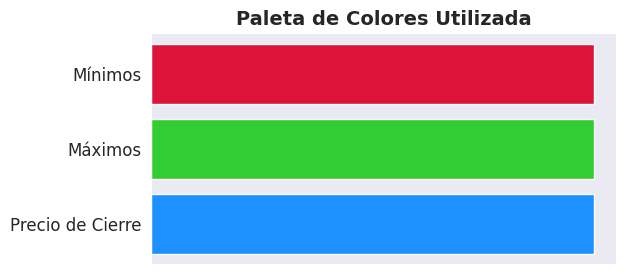

In [30]:
# @title
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con la paleta de colores utilizada
colores = {
    "Elemento Visual": ["Precio de Cierre", "Máximos", "Mínimos"],
    "Color Utilizado": ["DodgerBlue", "LimeGreen", "Crimson"],
    "Código Hexadecimal": ["#1E90FF", "#32CD32", "#DC143C"],
    "Representación": ["Línea principal de tendencia", "Puntos altos del precio", "Puntos bajos del precio"]
}

df_colores = pd.DataFrame(colores)

# Mostrar la tabla de colores en el entorno
display(df_colores)

# Crear el gráfico de barras horizontales para visualizar los colores
plt.figure(figsize=(6, 3))
plt.barh(df_colores["Elemento Visual"], width=1, color=df_colores["Código Hexadecimal"])
plt.title("Paleta de Colores Utilizada", fontsize=14, fontweight="bold")
plt.xticks([])
plt.yticks(fontsize=12)
plt.grid(False)
plt.show()


## ✅ Conclusión

Este análisis visual fue modelado estratégicamente considerando:

- Un **dataset financiero y temporal** como base.
- **Dimensiones visuales** bien definidas para comunicar el mensaje de forma clara.
- **Gráficos adecuados** al objetivo del análisis (evolución temporal de precios).

Gracias a esta estructura, fue posible transformar datos crudos en **insights visuales significativos**, facilitando la toma de decisiones basada en datos.
